# LASIO

In [1]:
%pip install lasio

Note: you may need to restart the kernel to use updated packages.


    nbconvert (!=5.4nbformat) ; extra == 'docs'
              ~~~~~~^

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
las_file="../data/15-9-19_SR_COMP.las"

In [3]:
import lasio

In [4]:
las_data=lasio.read(las_file)
# las_data.df()

In [5]:
temp_df=las_data.df()

In [6]:
temp_df

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4635.9044,NaN,NaN,NaN,NaN,NaN,0.7729,0.5978
4636.0568,NaN,NaN,NaN,NaN,NaN,0.8369,0.6257
4636.2092,NaN,NaN,NaN,NaN,NaN,0.8741,0.6888


In [7]:
select_cols=["DT","DTS","GR","NPHI","RHOB","RT"]

In [8]:
las_data.df()[select_cols]

KeyError: "['DT', 'DTS', 'NPHI', 'RHOB', 'RT'] not in index"

In [9]:
import pandas as pd

In [10]:
folder="data"
select_cols=["DT","DTS","GR","NPHI","RHOB","RT"]

In [11]:
def process_data(folder:str, select_cols:list[str])->pd.DataFrame:
    from tqdm.notebook import tqdm
    from pathlib import Path    
    las_folder = Path(f"../{folder}") 
    las_files = list(las_folder.glob("*.las")) 
    lst_df=[]
    result_df=pd.DataFrame()    
    for f in tqdm(las_files,desc="Processing Las file"):
        temp_select_cols=select_cols.copy()
        try: 
            las_F=lasio.read(f)
            well_name=las_F.well.WELL.value
            temp_df=las_F.df()
            temp_df.loc[:,"Well"]=well_name
            temp_select_cols.append("Well")
            lst_df.append(temp_df[temp_select_cols])
        except Exception as e:
            print(f"Error on file {f} as {str(e)}")
            continue # move to next file
    result_df=pd.concat(lst_df,ignore_index=True)

    return result_df


In [12]:
folder="data"
select_cols=["DT","DTS","GR","NPHI","RHOB","RT"]

In [13]:
res_df=process_data(folder=folder,select_cols=select_cols)

Processing Las file:   0%|          | 0/6 [00:00<?, ?it/s]

Error on file ..\data\15-9-19_SR_COMP.las as "['DT', 'DTS', 'NPHI', 'RHOB', 'RT'] not in index"
Error on file ..\data\15_9-F-11B.LAS as "['DT', 'DTS'] not in index"
Error on file ..\data\15_9-F-1C.LAS as "['DT', 'DTS'] not in index"


In [14]:
print(res_df)

        DT  DTS     GR  NPHI  RHOB  RT         Well
0      NaN  NaN  4.300   NaN   NaN NaN  15/9-F-11 A
1      NaN  NaN  3.801   NaN   NaN NaN  15/9-F-11 A
2      NaN  NaN  4.301   NaN   NaN NaN  15/9-F-11 A
3      NaN  NaN  4.600   NaN   NaN NaN  15/9-F-11 A
4      NaN  NaN  4.599   NaN   NaN NaN  15/9-F-11 A
...     ..  ...    ...   ...   ...  ..          ...
104282 NaN  NaN    NaN   NaN   NaN NaN   15/9-F-1 B
104283 NaN  NaN    NaN   NaN   NaN NaN   15/9-F-1 B
104284 NaN  NaN    NaN   NaN   NaN NaN   15/9-F-1 B
104285 NaN  NaN    NaN   NaN   NaN NaN   15/9-F-1 B
104286 NaN  NaN    NaN   NaN   NaN NaN   15/9-F-1 B

[104287 rows x 7 columns]


In [15]:
res_df.dropna()

,DT,DTS,GR,NPHI,RHOB,RT,Well
23944,107.0670,261.0360,55.1860,0.3520,2.3260,0.7810,15/9-F-11 A
23945,107.8100,260.1610,57.0150,0.3640,2.3250,0.7720,15/9-F-11 A
23946,108.2310,261.0670,58.9230,0.3700,2.3210,0.7050,15/9-F-11 A
23947,108.4280,262.5100,57.3220,0.3670,2.3120,0.6540,15/9-F-11 A
23948,108.2220,263.3600,53.0540,0.3500,2.2980,0.6110,15/9-F-11 A
...,...,...,...,...,...,...,...
103879,76.4480,136.8919,51.6833,0.1875,2.4461,1.1323,15/9-F-1 B
103880,76.1982,136.7067,52.9685,0.1850,2.4506,1.1693,15/9-F-1 B
103881,75.8560,136.5749,54.0012,0.1785,2.4563,1.1792,15/9-F-1 B
103882,75.5494,135.3308,52.6933,0.1777,2.4590,1.2081,15/9-F-1 B


In [16]:
res_df

,DT,DTS,GR,NPHI,RHOB,RT,Well
0,NaN,NaN,4.300,NaN,NaN,NaN,15/9-F-11 A
1,NaN,NaN,3.801,NaN,NaN,NaN,15/9-F-11 A
2,NaN,NaN,4.301,NaN,NaN,NaN,15/9-F-11 A
3,NaN,NaN,4.600,NaN,NaN,NaN,15/9-F-11 A
4,NaN,NaN,4.599,NaN,NaN,NaN,15/9-F-11 A
...,...,...,...,...,...,...,...
104282,NaN,NaN,NaN,NaN,NaN,NaN,15/9-F-1 B
104283,NaN,NaN,NaN,NaN,NaN,NaN,15/9-F-1 B
104284,NaN,NaN,NaN,NaN,NaN,NaN,15/9-F-1 B
104285,NaN,NaN,NaN,NaN,NaN,NaN,15/9-F-1 B


In [17]:
drop_df=res_df.drop(columns="Well").dropna()

In [18]:
drop_df

,DT,DTS,GR,NPHI,RHOB,RT
23944,107.0670,261.0360,55.1860,0.3520,2.3260,0.7810
23945,107.8100,260.1610,57.0150,0.3640,2.3250,0.7720
23946,108.2310,261.0670,58.9230,0.3700,2.3210,0.7050
23947,108.4280,262.5100,57.3220,0.3670,2.3120,0.6540
23948,108.2220,263.3600,53.0540,0.3500,2.2980,0.6110
...,...,...,...,...,...,...
103879,76.4480,136.8919,51.6833,0.1875,2.4461,1.1323
103880,76.1982,136.7067,52.9685,0.1850,2.4506,1.1693
103881,75.8560,136.5749,54.0012,0.1785,2.4563,1.1792
103882,75.5494,135.3308,52.6933,0.1777,2.4590,1.2081


In [19]:
corr=drop_df.corr()

In [20]:
corr

,DT,DTS,GR,NPHI,RHOB,RT
DT,1.000000,0.844701,0.560047,0.919718,-0.789119,0.008131
DTS,0.844701,1.000000,0.416616,0.815519,-0.649116,-0.005318
GR,0.560047,0.416616,1.000000,0.690362,-0.224307,0.085410
NPHI,0.919718,0.815519,0.690362,1.000000,-0.683222,0.012647
RHOB,-0.789119,-0.649116,-0.224307,-0.683222,1.000000,0.019845
RT,0.008131,-0.005318,0.085410,0.012647,0.019845,1.000000


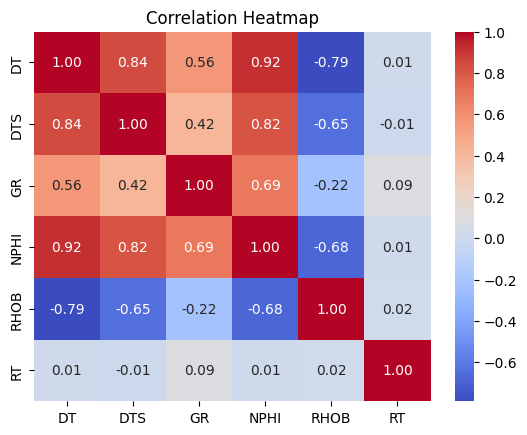

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [22]:
import numpy as np

In [28]:
one_corr=np.ones_like(corr,dtype=bool)
mask=np.triu(one_corr)# che ben tren
mask

array([[ True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True]])

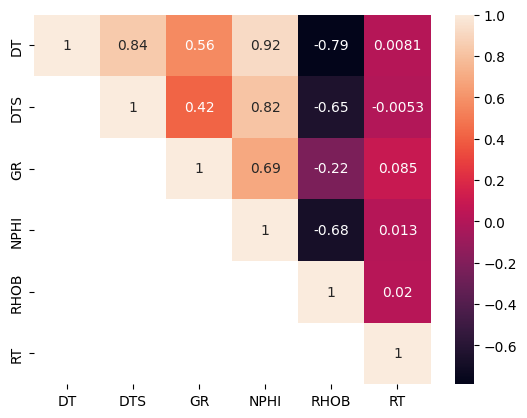

In [29]:
sns.heatmap(data=corr,mask=1-mask,annot=True);

In [ ]:
# mask=abs(corr)<0.5

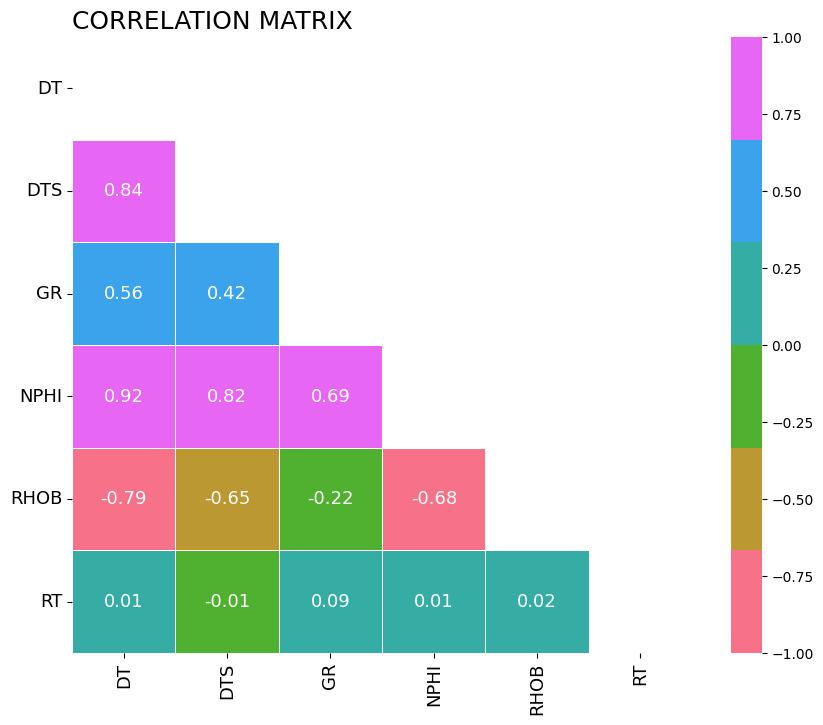

In [30]:
fig, ax = plt.subplots(figsize=(10,8))


#That method uses HUSL colors, so you need hue, saturation, and lightness. 
#I used hsluv.org to select the colors of this chart.
# cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
cmap=sns.husl_palette()

sns.heatmap(data=corr, mask=mask,
            annot=True, annot_kws={"fontsize":13}, fmt=".2f",cmap=cmap,
            vmin=-1, vmax=1,
            linecolor='white', linewidths=0.5);

yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);
title = 'CORRELATION MATRIX'
ax.set_title(title, loc='left', fontsize=18);